## Prepare the spatial data
For developing the algorithm of continuou urbano-rural we'll use a piece of the actual data. By doing so, we can reduce the amount of time use to operate and develop the first alghorithm version.

To aim this, we've decied to only use the data from Cajamarca, La libertad and Lambayeque regions, these are Peruvian's regions located in the north of the country. The algorithm has 4 arguments: 1) the raster files, 2) the shp file, 3) the density value and 4) the min number of population accepted for the new polygon.

Because of that, the following script create the first and the second arguments which will be used in the algorithm.

we need to clip the raster using the geometries of regions mentioned above and keeping the "centros poblados" located in these areas


In [2]:
import pandas as pd
import geopandas as gpd

import numpy as np
import rasterio as rio 
import rioxarray as rxr
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### Difine the path where is located the spatial data. In our case, the data is stored in the cloud service, though we can access it through the local directories using drive's software
path_g=r'G:\.shortcut-targets-by-id\1lo4KTB2LsIKtS4YUkDAhWKPnbZSGVDFI\Publicación - Pre-PNOICP\04. Data\00. Cartografía base'
### show the files allocated in the specified folder
os.listdir(path_g)  

['inei_centros_poblados_2017_edits.shp',
 'inei_centros_poblados_2017_edits.dbf',
 'inei_centros_poblados_2017_edits.shx',
 'inei_centros_poblados_2017_edits.prj',
 'DensidadViviendas.tif.aux.xml',
 'DensidadViviendas.tif',
 'GHS_POP_E2015_GLOBE_R2019A_54009_250_V1_0_10_10',
 'JRC_GRID_2018',
 'GHS_POP_E2015_GLOBE_R2019A_54009_1K_V1_0_10_10',
 'Limites distritales VMGT',
 'Limites dep 2017',
 'inei_centros_poblados_2017_edits.qix']

The spatial data of Peruvian regions is stored in the folder "Limites dep 2017" with the name of "DEPARTAMENTOS".
Also we already know the corresponding INEI's codes for each one as following:
- Cajamarca: 06
- La Libertad: 13
- Lambayeque: 14


<AxesSubplot:>

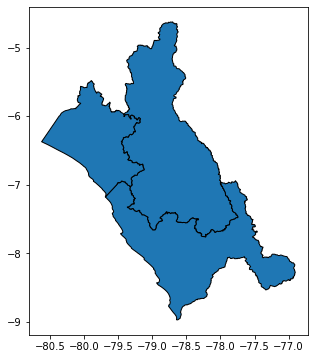

In [18]:
### Read the Peruvian's region using geopandas function read_file
dep=gpd.read_file(path_g+'\\Limites dep 2017\\DEPARTAMENTO.shp')
### Create a GeoDataFrame 
dep_c=dep[(dep.IDDPTO=="06")|(dep.IDDPTO=="13")|(dep.IDDPTO=="14")].copy()
### show a plot of the area
dep_c.plot(figsize=(5,7),edgecolor='black')

#### Clip the Raster
Using the polygon of Cajamarca, we're going to clip the raster of Building Density in order to only work with a smaller amount of data. To make this operation we have to be sure that both are in the same Coordinate Reference system (CRS)

We've already know that the raster is projected on "EPSG:32718", so we must reproject the polygon to the same coordinate reference system before clipping the raster

In [5]:
### print the CRS of the spatial data
print("The CRS of the Polygon the three regions is:{}".format(dep_c.crs))
### we change the CRS using the function to_crs()
dep_c=dep_0.to_crs("EPSG:32718")
print("The CRS of the Polygon the three region is:{}".format(dep_c.crs))

The CRS of the Polygon the three regions is:epsg:4326
The CRS of the Polygon the three region is:EPSG:32718


Now that have the polygon in the right CRS, we can use it to clip the building density raster. To doing that we'll use the library named rioxarray and the sub function named rio.clip()

In [14]:
with rxr.open_rasterio(path_g+"\\DensidadViviendas.tif", masked=True) as des_v:
    ## using rasterio function clip and the polygons geometry, we create a new raster for Cajamarca Region
    clipped = des_v.rio.clip(dep_c.geometry, dep_c.crs, drop=True, from_disk=True)
    ## save the clipped raster inside the data base folder in the local machine
    clipped.rio.to_raster(r"C:\Users\Guillermo\Desktop/Python/01. Continuo urbano-rural/01. Dataset/costal_north_region_clip.tif")

Finally, we create the shp containing the data of ccpp located inside the working regions. 

In [4]:
### Read the Peruvian's ccpp using geopandas' function read_file
ccpp=gpd.read_file(path_g+'\\inei_centros_poblados_2017_edits.shp')
### Create a sub GeoDataFrame only conteiming Cajamarca's ccpp
ccpp_0=ccpp[(ccpp.idccpp_17.str[0:2]=="06")|
           (ccpp.idccpp_17.str[0:2]=="13")|
           (ccpp.idccpp_17.str[0:2]=="14")][['id','idccpp_17','pob_tot17','geometry']].copy()

print("The points' CRS  for the ccpp is:{}".format(ccpp_0.crs))
### Reproject the shp to EPSG:32718
ccpp_0=ccpp_0.to_crs("EPSG:32718")
### Save the data
ccpp_0.to_file(r"C:\Users\Guillermo\Desktop/Python/01. Continuo urbano-rural/01. Dataset/costal_north_ccpp_edit.shp")

The points' CRS  for the ccpp is:epsg:32718
